In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# right-hand side of ODE

def f(r, X, gamma):
    f1 = X[1]
    f2 = -2*X[1]/r + 2*(X[2] - gamma)*X[0]
    f3 = X[3]
    f4 = -2*X[3]/r + np.power(X[0],2)
    return np.array([f1, f2, f3, f4])

# interval of solution and number of steps
ri, rf = 0, 10
steps = 1000
dr = (rf - ri)/steps
rinterv = np.linspace(ri, rf, steps, endpoint=True)

# single step of RK4
def rk4step(r, X, gamma):
    k1 = dr*f(r, X, gamma)
    k2 = dr*f(r + dr/2, X + k1/2, gamma)
    k3 = dr*f(r + dr/2, X + k2/2, gamma)
    k4 = dr*f(r + dr, X + k3, gamma)
    return X + (k1 + 2*k2 + 2*k3 + k4)/6

def rk4(Xbc, w):
    # initialize the arrays
    Xs = np.zeros((4, steps))

    # boundary conditions at r = ri
    Xs[..., 0] = Xbc

    # perform RK4
    for step in np.arange(1, steps):
        rnow = rinterv[step]
        Xs[..., step] = rk4step(rnow, Xs[..., step - 1], w)
    
        if np.abs(Xs[0, step]) > 100:
            return None

    return Xs

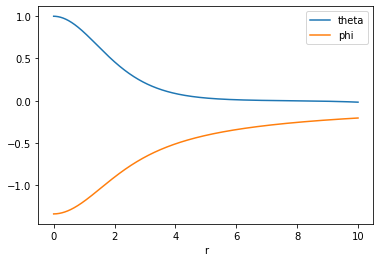

In [64]:
# Reproducing solution from Doddy's papper
gamma, phi0 = -0.692, -1.3415238997
Xbc = np.array([1, 0, phi0, 0])

Xs = rk4(Xbc, gamma)
plt.plot(rinterv, Xs[0].T, label = "theta")
plt.plot(rinterv, Xs[2].T, label = "phi")
plt.xlabel("r")
plt.legend();

In [107]:
def mc_step(gamma, phi0, oldvar):
    Xbc_step = np.array([1, 0, phi0, 0])
    Xs_step = rk4(Xbc_step, gamma)

    if Xs_step is None:
        return None

    diff1 = Xs_step[..., steps - 1][1] + np.sqrt(-2*gamma)*Xs_step[..., steps - 1][0]
    diff2 = Xs_step[..., steps - 1][3] + Xs_step[..., steps - 1][2]/rinterv[steps - 1]
    newvar = np.power(diff1,2) + np.power(diff2,2)

    if newvar < oldvar:
        return True, newvar
    elif newvar >= oldvar:
        return False, oldvar


def find_sol():
    var = 1e10
    gamma, phi0 = 0, np.random.uniform(-2,0)

    nsteps = 100000
    count = 0
    for i in np.arange(nsteps):
        gammaold, phi0old = gamma, phi0
        # gamma += np.random.normal(0,0.01)
        phi0 += np.random.normal(0,0.001)

        if gamma > 0:
            gamma = gammaold

        mcs = mc_step(gamma, phi0, var)
        if mcs is None:
            print('mcs is None')
            gamma, phi0 = gammaold, phi0old
            count += 1
        elif mcs[0]:
            var = mcs[1]
        else:
            gamma, phi0 = gammaold, phi0old
            count += 1
            
        varcut = 0.001
        if var < varcut:
            return var, [gamma, phi0]
        elif count > 100:
            return None

In [108]:
varis, pairs = [], []
for i in np.arange(1000):
    solnow = find_sol()

    if solnow is not None:
        print("Solution found.")
        varis.append(solnow[0])
        pairs.append(solnow[1])

Solution found.
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None
mcs is None


KeyboardInterrupt: 

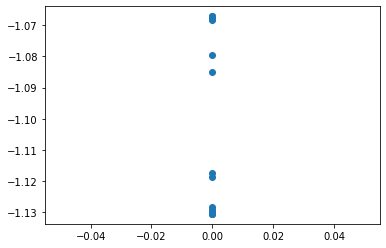

In [109]:
plt.scatter(np.array(pairs).T[0], np.array(pairs).T[1])

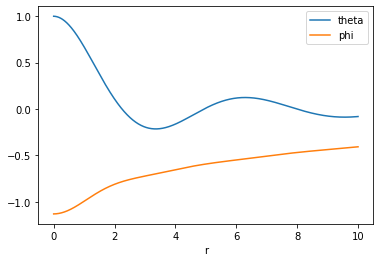

In [110]:
gamma, phi0 = pairs[0]
Xbc = np.array([1, 0, phi0, 0])

Xs = rk4(Xbc, gamma)
plt.plot(rinterv, Xs[0].T, label = "theta")
plt.plot(rinterv, Xs[2].T, label = "phi")
plt.xlabel("r")
plt.legend()

In [48]:
pairs[0]

[0, -1.4253639369370537]

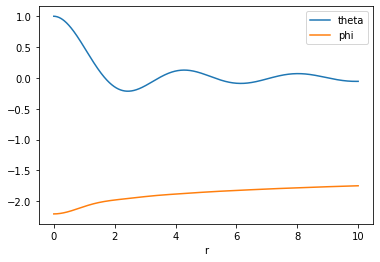

In [13]:
Xbc = np.array([1, 0, phi0, 0])

Xs, final_step = rk4(Xbc, gamma)[0], rk4(Xbc, gamma)[1]
plt.plot(rinterv, Xs[0].T, label = "theta")
plt.plot(rinterv, Xs[2].T, label = "phi")
plt.xlabel("r")
plt.legend()